In [1]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [3]:
df=pd.read_csv('block_106.csv')

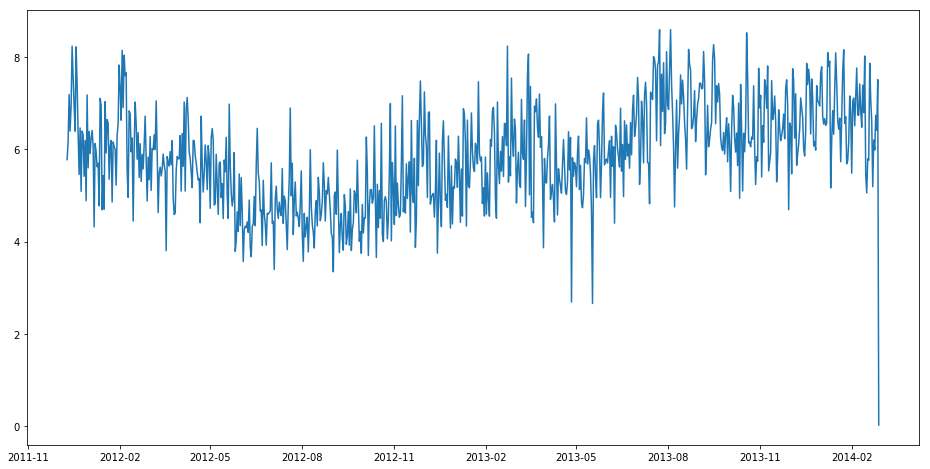

In [4]:
#setting index as date
df['day'] = pd.to_datetime(df.day,format='%d-%m-%Y')
df.index = df['day']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['energy_sum'], label='energy_sum')

In [5]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['day', 'energy_sum'])

for i in range(0,len(data)):
    new_data['day'][i] = data['day'][i]
    new_data['energy_sum'][i] = data['energy_sum'][i]

In [6]:
new_data.index = new_data.day
new_data.drop('day', axis=1, inplace=True)

In [7]:
dataset = new_data.values

In [8]:
train = dataset[0:600,:]
valid = dataset[600:,:]


In [9]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

C:\Users\mathew.alexander\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train

array([[0.67134011, 0.71527048, 0.83596215, ..., 0.50134361, 0.71199907,
        0.69026755],
       [0.71527048, 0.83596215, 0.74354481, ..., 0.71199907, 0.69026755,
        0.65323052],
       [0.83596215, 0.74354481, 0.80745414, ..., 0.69026755, 0.65323052,
        0.6622269 ],
       ...,
       [0.73010866, 0.75265802, 0.78618998, ..., 0.88737002, 0.79343381,
        0.9164622 ],
       [0.75265802, 0.78618998, 0.87930833, ..., 0.79343381, 0.9164622 ,
        0.73700199],
       [0.78618998, 0.87930833, 0.82801729, ..., 0.9164622 , 0.73700199,
        0.76212174]])

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
x_train.shape

(570, 30, 1)

In [14]:
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(units=240, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(.2))
# model.add(LSTM(units=120,return_sequences=True))
# model.add(Dropout(.2))
# model.add(LSTM(units=50))
# model.add(Dropout(.2))

# model.add(Dense(1))


In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10))
model.add(Dense(1))


In [27]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=2)


Epoch 1/50
 - 4s - loss: 0.0178
Epoch 2/50
 - 1s - loss: 0.0095
Epoch 3/50
 - 1s - loss: 0.0092
Epoch 4/50
 - 1s - loss: 0.0094
Epoch 5/50
 - 1s - loss: 0.0096
Epoch 6/50
 - 1s - loss: 0.0091
Epoch 7/50
 - 1s - loss: 0.0090
Epoch 8/50
 - 2s - loss: 0.0092
Epoch 9/50
 - 2s - loss: 0.0094
Epoch 10/50
 - 1s - loss: 0.0092
Epoch 11/50
 - 1s - loss: 0.0091
Epoch 12/50
 - 1s - loss: 0.0091
Epoch 13/50
 - 1s - loss: 0.0094
Epoch 14/50
 - 2s - loss: 0.0092
Epoch 15/50
 - 2s - loss: 0.0096
Epoch 16/50
 - 2s - loss: 0.0099
Epoch 17/50
 - 2s - loss: 0.0090
Epoch 18/50
 - 1s - loss: 0.0091
Epoch 19/50
 - 1s - loss: 0.0091
Epoch 20/50
 - 1s - loss: 0.0093
Epoch 21/50
 - 1s - loss: 0.0093
Epoch 22/50
 - 1s - loss: 0.0093
Epoch 23/50
 - 2s - loss: 0.0089
Epoch 24/50
 - 2s - loss: 0.0089
Epoch 25/50
 - 1s - loss: 0.0090
Epoch 26/50
 - 1s - loss: 0.0089
Epoch 27/50
 - 1s - loss: 0.0090
Epoch 28/50
 - 2s - loss: 0.0090
Epoch 29/50
 - 1s - loss: 0.0094
Epoch 30/50
 - 1s - loss: 0.0094
Epoch 31/50
 - 2s -

In [28]:

inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [29]:
inputs.shape[0]

242

In [30]:
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
    

X_test = np.array(X_test)



In [31]:
X_test

array([[0.87930833, 0.82801729, 0.60871597, ..., 0.73700199, 0.76212174,
        0.94438603],
       [0.82801729, 0.60871597, 0.67157378, ..., 0.76212174, 0.94438603,
        0.81177708],
       [0.60871597, 0.67157378, 0.81902091, ..., 0.94438603, 0.81177708,
        0.79822409],
       ...,
       [0.66070803, 0.66865288, 0.71538731, ..., 0.72076177, 0.69575885,
        0.78338591],
       [0.66865288, 0.71538731, 0.83234023, ..., 0.69575885, 0.78338591,
        0.74576469],
       [0.71538731, 0.83234023, 0.79039607, ..., 0.78338591, 0.74576469,
        0.8737002 ]])

In [32]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
energySum = model.predict(X_test)
energySum = scaler.inverse_transform(energySum)

In [33]:
# energySum = model.predict(X_test)
# energySum = scaler.inverse_transform(energySum)

In [34]:
# rms=np.sqrt(np.mean(np.power((valid-energySum),2)))

In [35]:
# rms

C:\Users\mathew.alexander\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Text(0.5,0,'Time')

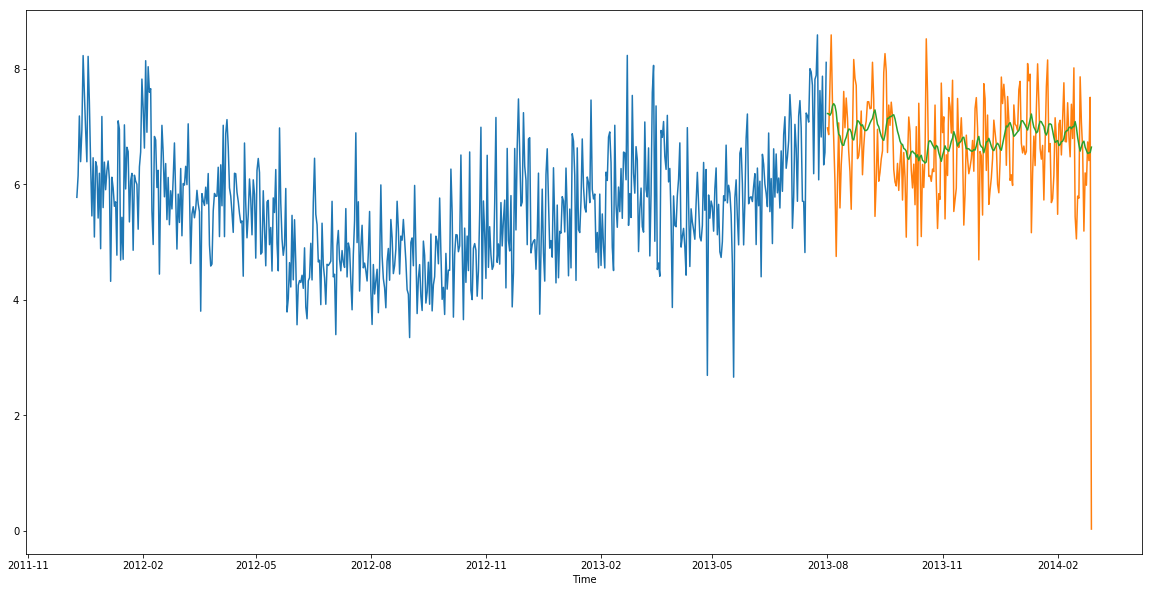

In [36]:
train = new_data[:600]
valid = new_data[600:]
valid['Predictions'] = energySum
plt.plot(train['energy_sum'])
plt.plot(valid[['energy_sum','Predictions']])
plt.xlabel("Time")